In [2]:
import geopandas as gpd
from pathlib import Path
import yaml
from rasterio.crs import CRS

In [3]:
DIST_EVENT_REPO = Path('../dist-s1-events')

In [4]:
EVENT_YAML_DIR = DIST_EVENT_REPO / 'events'
yaml_file = EVENT_YAML_DIR / f'chile_fire_2024.yml'
with open(yaml_file) as f:
    event_dict = yaml.safe_load(f)["event"]
event_dict

{'event_name': 'chile_fire_2024',
 'bounds': [-71.53071089, -33.20143816, -71.2964628, -32.98270579],
 'event_date': '2024-02-04',
 'pre_event_window_days': 180,
 'post_event_window_days': 100,
 'rtc_track_numbers': [18, 156],
 'mgrs_tiles': ['19HBD'],
 'source_id': 'EMSR715 AOI1',
 'dist_hls_confirmed_change_min_days': 30,
 'links': ['https://earthobservatory.nasa.gov/images/152411/fires-rage-in-central-chile',
  'https://en.wikipedia.org/wiki/2024_Chile_wildfires']}

In [5]:
VAL_AOI_DIR = DIST_EVENT_REPO / 'external_validation_data_extents_db/'

In [6]:
def get_type(name: str) -> str:
    if 'fire' in name:
        return 'fire'
    if 'landslide' in name:
        return 'landslide'
    if 'flood' in name:
        return 'flood'
def format_yaml_data(yaml_path: Path):
    with open(yaml_path) as f:
        event_dict = yaml.safe_load(f)["event"]

    name = event_dict['event_name']
    val_aoi = gpd.read_file(VAL_AOI_DIR / f'{name}.geojson')
    
    out = {'event_name': name,
           'track_numbers': ' '.join(list(map(str, event_dict['rtc_track_numbers']))),
           'n_tracks': len(event_dict['rtc_track_numbers']),
           'event_type': get_type(name),
           'geometry': val_aoi.geometry.unary_union.centroid}
    return out

In [7]:
yaml_paths = list(EVENT_YAML_DIR.glob('*.yml'))
data = list(map(format_yaml_data, yaml_paths))
data[:3]

[{'event_name': 'chiapas_fire_2024',
  'track_numbers': '172 107',
  'n_tracks': 2,
  'event_type': 'fire',
  'geometry': <POINT (-94.345 16.648)>},
 {'event_name': 'yajiang_fire_2024',
  'track_numbers': '26 135',
  'n_tracks': 2,
  'event_type': 'fire',
  'geometry': <POINT (101.139 30.133)>},
 {'event_name': 'bangladesh_coastal_flood_2024',
  'track_numbers': '150 114',
  'n_tracks': 2,
  'event_type': 'flood',
  'geometry': <POINT (90.039 23.083)>}]

<Axes: >

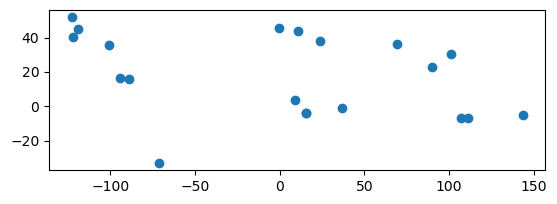

In [8]:
df_events = gpd.GeoDataFrame(data, crs=CRS.from_epsg(4326))
df_events = df_events[~df_events.event_name.str.contains('durkee')]
df_events.plot()

In [9]:
df_events

,event_name,track_numbers,n_tracks,event_type,geometry
0,chiapas_fire_2024,172 107,2,fire,POINT (-94.34451 16.64831)
1,yajiang_fire_2024,26 135,2,fire,POINT (101.13874 30.13296)
2,bangladesh_coastal_flood_2024,150 114,2,flood,POINT (90.03851 23.08317)
3,park_fire_2024,137 115,2,fire,POINT (-121.77916 40.08287)
4,chilcotin_river_landslide_and_flood_2024,13 137,2,landslide,POINT (-122.80448 51.85728)
5,demak_flood_2024,76 127,2,flood,POINT (110.87344 -6.89332)
6,papau_new_guinea_landslide_2024,9 133,2,landslide,POINT (143.36498 -5.38015)
7,bioko_fire_2024,30 51,2,fire,POINT (8.74928 3.58532)
8,attica_fire_2024,7 102 109,3,fire,POINT (23.91358 38.12181)
9,belize_fire_south_2024,18 156,2,fire,POINT (-89.08625 16.09611)


In [10]:
df_events.to_file('dist_s1_events.geojson', driver='GeoJSON')

In [11]:
event_track_lut = {e: t.split(' ') 
                   for (e, t) in zip(df_events.event_name.tolist(), df_events.track_numbers.tolist()) if t}
event_track_lut

{'chiapas_fire_2024': ['172', '107'],
 'yajiang_fire_2024': ['26', '135'],
 'bangladesh_coastal_flood_2024': ['150', '114'],
 'park_fire_2024': ['137', '115'],
 'chilcotin_river_landslide_and_flood_2024': ['13', '137'],
 'demak_flood_2024': ['76', '127'],
 'papau_new_guinea_landslide_2024': ['9', '133'],
 'bioko_fire_2024': ['30', '51'],
 'attica_fire_2024': ['7', '102', '109'],
 'belize_fire_south_2024': ['18', '156'],
 'tuscany_flood_2023': ['15', '168'],
 'afghanistan_flood_2024': ['71', '78'],
 'mai_mahiu_flood_and_landslides_2024': ['130', '57'],
 'cipongkor_landslides_2024': ['98', '149'],
 'chile_fire_2024': ['18', '156'],
 'brazzaville_flood_and_landslides_2023': ['7', '109'],
 'smokehouse_creek_fire_2024': ['5', '12'],
 'monkey_creek_fire_2024': ['64'],
 'southwest_france_flood_2023': ['30', '8'],
 'brazzaville_flood_and_landslides_2024': ['7', '109']}